In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns
from pandas.plotting import scatter_matrix

In [68]:
data = pd.read_excel('..\Data\MOD_Internet_BAF1.xlsx')

In [69]:
data

,Año,Trimestre,Fecha,Provincia,Banda ancha fija,Dial up,Mbps (Media de bajada),ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Accesos por cada 100 hogares
0,2022,4,2022-10-01,Buenos Aires,4788466,6199.0,111.000000,325908,2767247,1499149,129910,72451,4794665,78.940000
1,2022,4,2022-10-01,Capital Federal,1549781,2145.0,182.860000,138753,1238196,138548,4603,31826,1551926,122.730000
2,2022,4,2022-10-01,Catamarca,70908,1.0,83.330000,8952,10998,47337,1379,2243,70909,65.770000
3,2022,4,2022-10-01,Chaco,143658,5.0,104.020000,24582,61265,47285,7957,2574,143663,43.620000
4,2022,4,2022-10-01,Chubut,167855,904.0,15.920000,45450,73923,9815,30721,8850,168759,85.570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,2014,1,2014-01-01,Santa Cruz,26304,460.0,3.315991,18927,100,381,4092,3264,26764,28.939093
860,2014,1,2014-01-01,Santa Fe,506000,612.0,3.147407,322662,174296,3059,5951,644,506612,47.847663
861,2014,1,2014-01-01,Santiago Del Estero,37124,9.0,2.949472,32567,3598,19,915,34,37133,16.309924
862,2014,1,2014-01-01,Tierra Del Fuego,27272,766.0,3.446888,21618,2837,648,1,2934,28038,63.965926


## EDA. Deteccion de outliers

## dataset 'Accesos a Internet Por Provincia'

In [70]:
data.describe()

,Año,Trimestre,Fecha,Banda ancha fija,Dial up,Mbps (Media de bajada),ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Accesos por cada 100 hogares
count,864.000000,864.000000,864,8.640000e+02,862.000000,864.000000,8.640000e+02,8.640000e+02,8.640000e+02,864.000000,864.000000,8.640000e+02,864.000000
mean,2018.000000,2.500000,2018-05-17 01:20:00,3.481485e+05,963.879350,15.375182,1.255457e+05,1.739913e+05,3.262331e+04,10720.798611,6228.967593,3.491101e+05,49.620138
min,2014.000000,1.000000,2014-01-01 00:00:00,1.219300e+04,0.000000,2.573729,6.120000e+03,0.000000e+00,0.000000e+00,0.000000,2.000000,1.255700e+04,9.347208
25%,2016.000000,1.750000,2016-03-09 06:00:00,5.221525e+04,9.000000,4.316775,2.232025e+04,8.912500e+03,2.052500e+02,261.000000,313.000000,5.232900e+04,32.216632
50%,2018.000000,2.500000,2018-05-16 12:00:00,1.044120e+05,148.000000,7.416094,4.816100e+04,3.498400e+04,1.233000e+03,4377.000000,1862.500000,1.045965e+05,46.386588
75%,2020.000000,3.250000,2020-07-24 00:00:00,1.791568e+05,619.000000,19.709719,1.025470e+05,7.168325e+04,1.564250e+04,12673.750000,7128.000000,1.801745e+05,62.442698
max,2022.000000,4.000000,2022-10-01 00:00:00,4.788466e+06,15229.000000,182.860000,1.586343e+06,2.767247e+06,1.499149e+06,129910.000000,73415.000000,4.794665e+06,124.061394
std,2.583484,1.118682,NaN,7.476219e+05,2397.370177,18.320956,2.520514e+05,4.276313e+05,1.325430e+05,18723.092796,10740.931282,7.494854e+05,23.319298


In [71]:
#calcular los outliers para la columna 'Total'
Q1 = data['Total'].quantile(0.25)
Q3 = data['Total'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_bound2 = Q1 - 1.5 * IQR
upper_bound2 = Q3 + 1.5 * IQR

# Identificar los outliers
outliers2 = data[(data['Total'] < lower_bound2) | (data['Total'] > upper_bound2)]
outliers2

,Año,Trimestre,Fecha,Provincia,Banda ancha fija,Dial up,Mbps (Media de bajada),ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Accesos por cada 100 hogares
0,2022,4,2022-10-01,Buenos Aires,4788466,6199.0,111.000000,325908,2767247,1499149,129910,72451,4794665,78.940000
1,2022,4,2022-10-01,Capital Federal,1549781,2145.0,182.860000,138753,1238196,138548,4603,31826,1551926,122.730000
5,2022,4,2022-10-01,Córdoba,1049592,68.0,108.770000,152265,456947,367393,61631,11424,1049660,89.030000
20,2022,4,2022-10-01,Santa Fe,887581,110.0,90.300000,163621,412157,248558,44113,19242,887691,78.400000
24,2022,3,2022-07-01,Buenos Aires,4715469,6199.0,70.190000,339648,2748325,1436433,126846,70416,4721668,78.110000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,2014,2,2014-04-01,Santa Fe,511753,605.0,3.311691,324101,178495,3085,6041,636,512358,48.390351
840,2014,1,2014-01-01,Buenos Aires,2725732,14144.0,3.733133,1567685,1000879,120960,16528,33824,2739876,54.570073
841,2014,1,2014-01-01,Capital Federal,1289204,10714.0,4.024082,445569,820161,17767,1866,14555,1299918,112.254123
845,2014,1,2014-01-01,Córdoba,566705,205.0,3.387405,336841,225769,347,3585,368,566910,52.517848


## EDA. Comprobacion de valores duplicados

In [72]:
# Mostrar un dataframe que indican si hay valore duplicados
duplicates = data[data.duplicated()]
duplicates

,Año,Trimestre,Fecha,Provincia,Banda ancha fija,Dial up,Mbps (Media de bajada),ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Accesos por cada 100 hogares


en el dataset no existen valores duplicados

## EDA. Comprobacion de valores faltantes

In [73]:
# Mostrar lista de coplumnas que indican la suma de valore faltantes
data.isnull().sum()

Año                             0
Trimestre                       0
Fecha                           0
Provincia                       0
Banda ancha fija                0
Dial up                         2
Mbps (Media de bajada)          0
ADSL                            0
Cablemodem                      0
Fibra óptica                    0
Wireless                        0
Otros                           0
Total                           0
Accesos por cada 100 hogares    0
dtype: int64

In [74]:
null_dial_up = data[data['Dial up'].isnull()]
null_dial_up

,Año,Trimestre,Fecha,Provincia,Banda ancha fija,Dial up,Mbps (Media de bajada),ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Accesos por cada 100 hogares
440,2018,2,2018-04-01,Formosa,44554,NaN,8.974987,23543,7311,18,13625,57,44554,29.434227
445,2018,2,2018-04-01,Misiones,106147,NaN,11.759657,57265,47923,512,391,56,106147,31.630908


para el dataset en la columna 'Dial up' existen 2 valores faltantes, los cuales serán sustituidos por la media de la columna.

In [75]:
data['Dial up'].fillna(data['Dial up'].mean(),inplace=True )

In [76]:
data.to_csv('..Data\data_mod.csv', index=False)

# EDA. Distribución de variables 

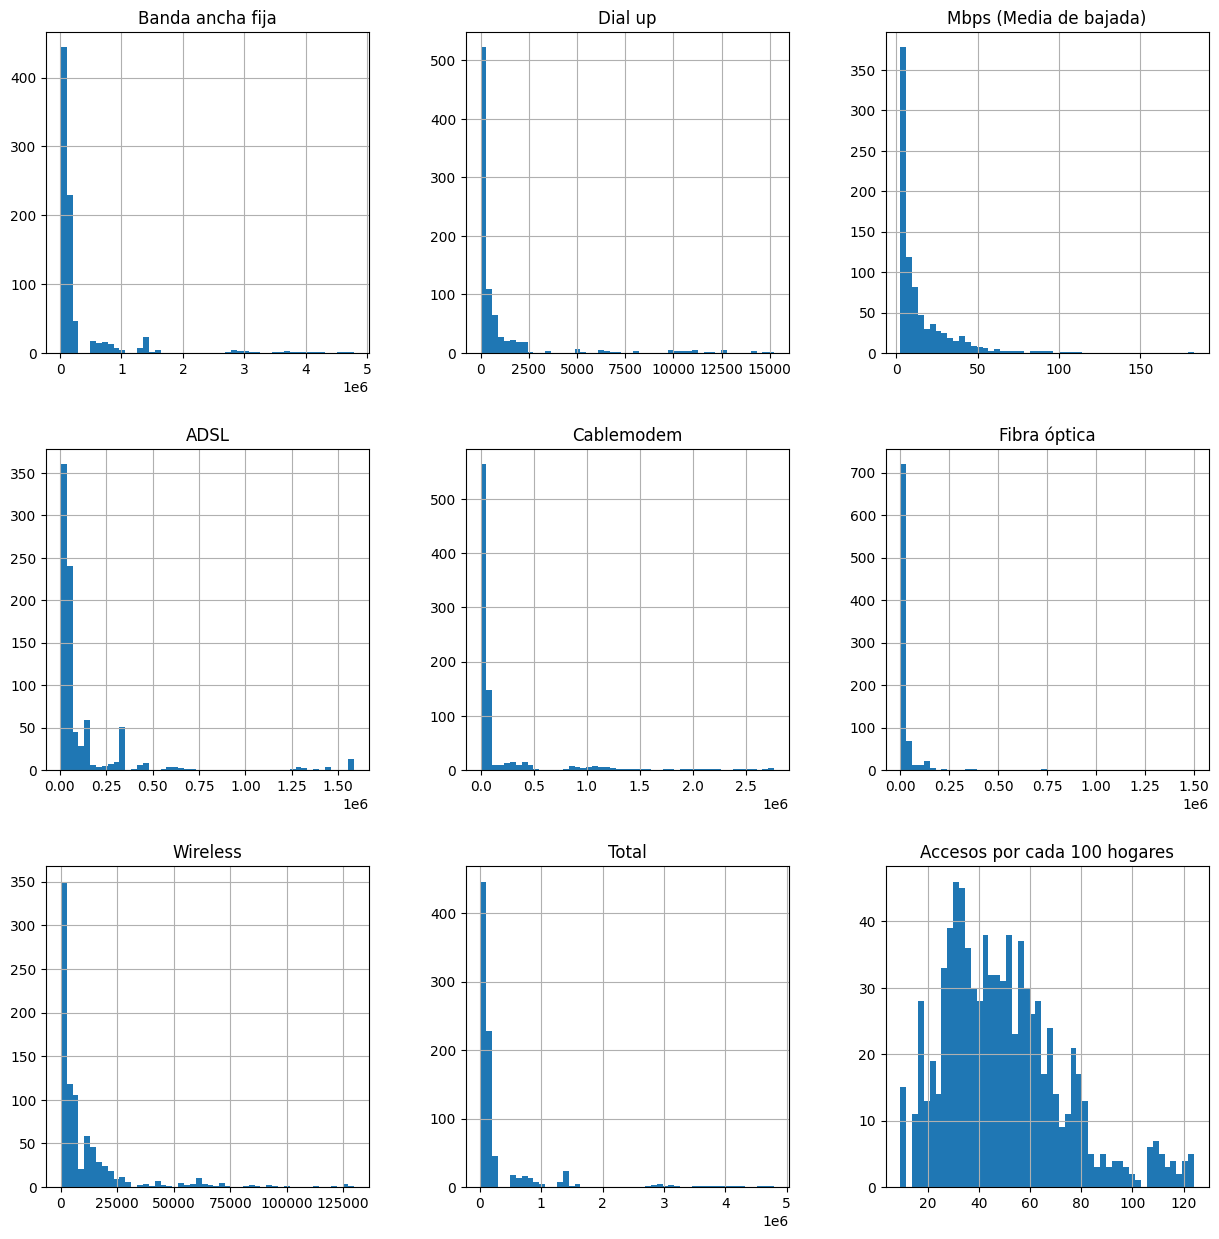

In [77]:
attributes = ['Banda ancha fija','Dial up','Mbps (Media de bajada)','ADSL','Cablemodem','Fibra óptica','Wireless','Total','Accesos por cada 100 hogares']
data[attributes].hist(bins=50, figsize=(15,15))
plt.show()

Figura 1. Se observa claramente una distribución sesgada hacia la izquierda con picos de distribución bastante pronunciados en todas las variables. Esto quiere decir que todos los valores que toman las variables se concentran hacia los valores menores posibles, reduciéndose en cantidad a medida que los valores de las variables se hacen mayores. Por otra parte, la presencia de valores atípicos o ‘outliers’ puede indicar una distribución no normal. en el caso de 'Accesos por cada 100 hogares' de igual manera presenta el mismo comportamiento solo que mas distrribuidos los valores.

Dado que se trata de datos oficiales, se tratarán los valores atípicos de la misma forma que los demás valores.

# EDA. Relación de variables 

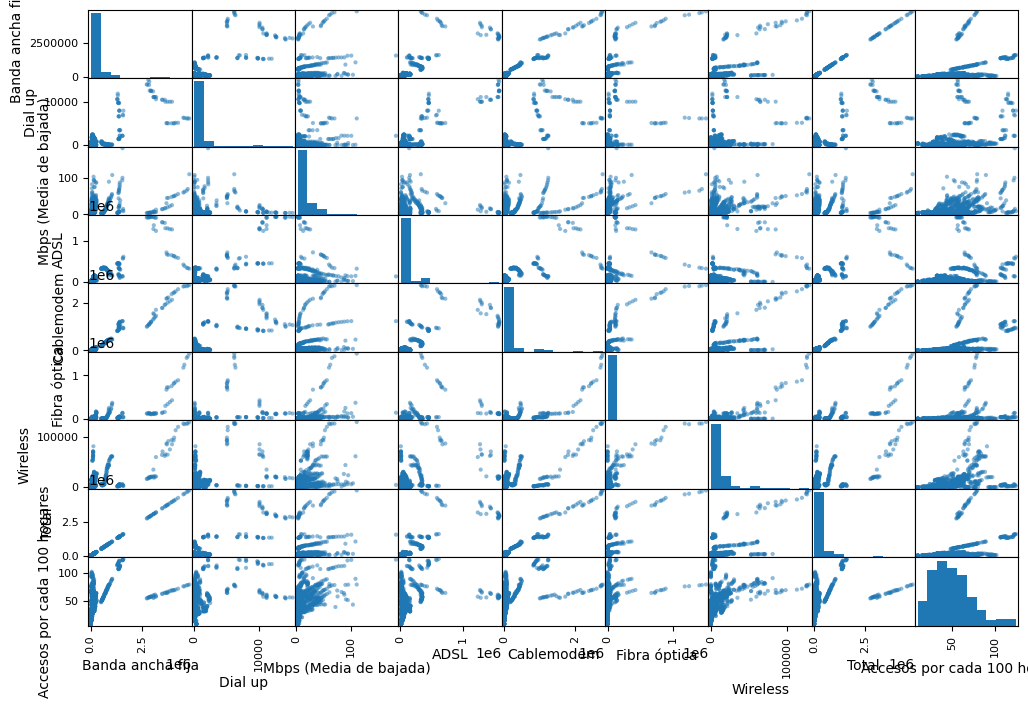

In [78]:
attributes = ['Banda ancha fija','Dial up','Mbps (Media de bajada)','ADSL','Cablemodem','Fibra óptica','Wireless','Total','Accesos por cada 100 hogares']
scatter_matrix(data[attributes], figsize=(12, 8))
plt.show()

Figura 2. en la Matriz de gráficos de dispersión muestra que todas las combinaciones de las dos variables tienen una relación proporcional de manera creciente en la mayoria de los casos, esto quiere decir que para la mayoria de los casos de relacion ambas variables aumentan una con respecto a la otra.

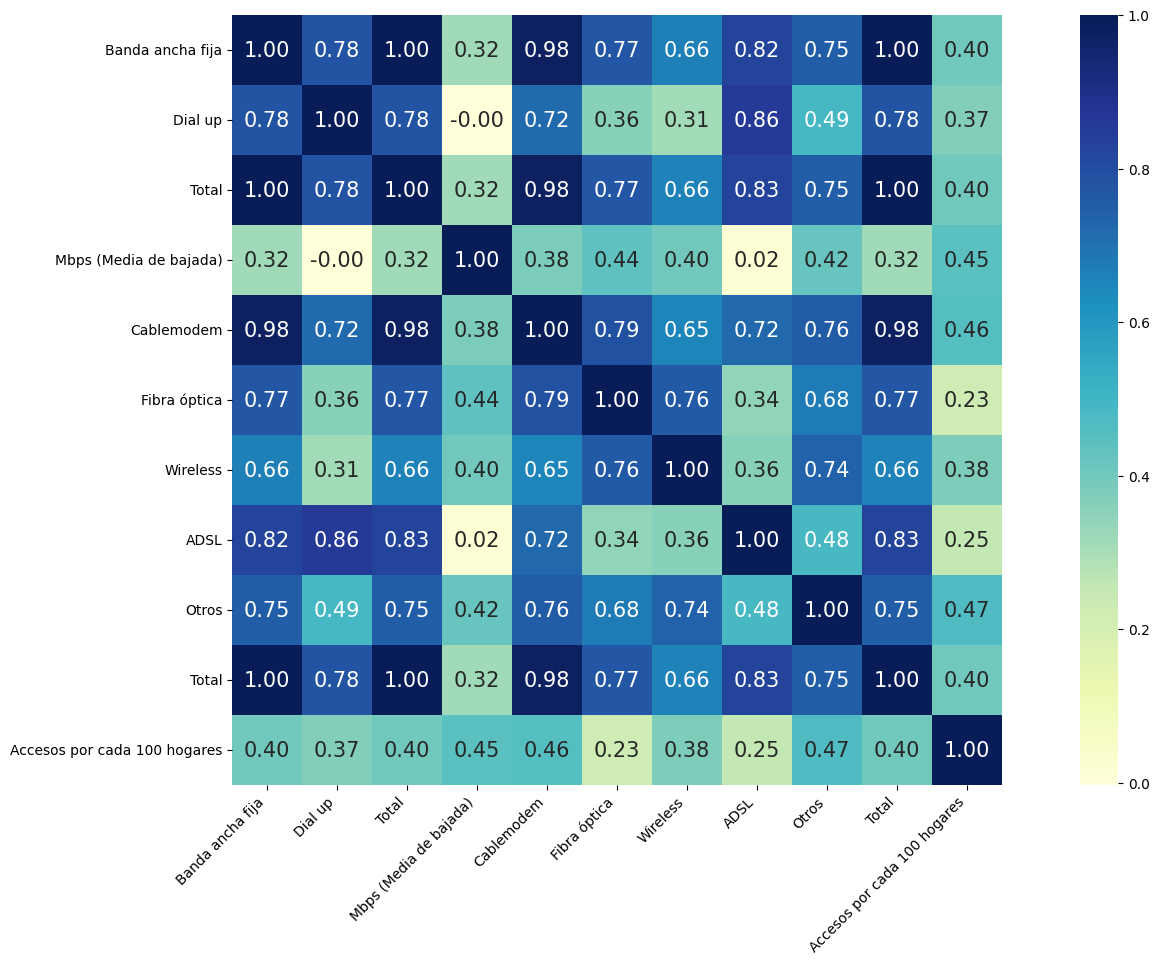

In [79]:
datac = data[['Banda ancha fija','Dial up','Total','Mbps (Media de bajada)','Cablemodem','Fibra óptica','Wireless','ADSL','Otros','Total','Accesos por cada 100 hogares']].corr()

# Hacemos un mapa de calor para ver la relación entre las variables de una manera más amena

plt.figure(figsize=(20, 10))

sns.heatmap(datac, annot=True, cmap="YlGnBu", annot_kws={"size": 15}, cbar=True, square=True, fmt='.2f')
plt.xticks(rotation=45, horizontalalignment='right')
plt.yticks(rotation=0)
plt.show()

Figura 3. Ahora observamos las mismas correlaciones calculadas en el grafico anterior, pero solo de manera mas visual y entendible, se puede observar claramente la alta correlacion de la mayoria de las variables debido a su relacion creciente. 

# EDA. Identificacion de Patrones y Tendencias

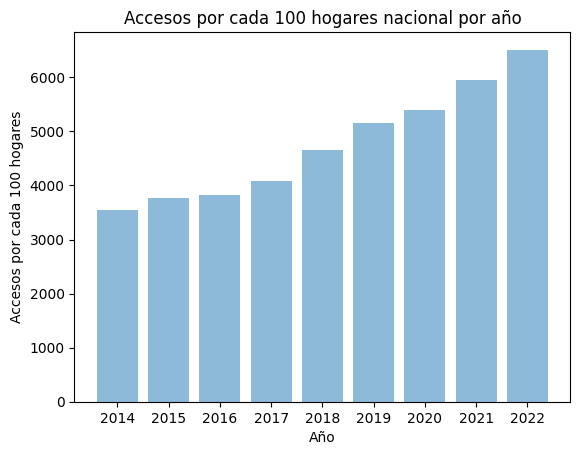

In [80]:
# Agrupa tus datos por 'año' y 'provincia' y calcula la suma de 'banda ancha' y 'dial up'
grouped = data.groupby(['Año'])[['Accesos por cada 100 hogares']].sum().reset_index()

# Crea una lista de provincias
años = grouped['Año'].unique()

# Crea un array para las posiciones de las barras en el eje X
bar_positions = np.arange(len(años))

# Crea las barras para 'banda ancha'
plt.bar(bar_positions, grouped['Accesos por cada 100 hogares'], align='center', alpha=0.5)

# Añade las etiquetas para el eje X
plt.xticks(bar_positions, años)

# Añade un título y etiquetas para los ejes
plt.title('Accesos por cada 100 hogares nacional por año')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')

# Muestra el gráfico
plt.show()

Figura 4. En el Histograma de 'Accesos por cada 100 hogares Nacional por año' se evidencia un claro crecimiento en el periodo del analisis, cada año presenta un aumento con respecto al año anterior, es decir, en el periodo analisado el crecimiento ha sido constante.

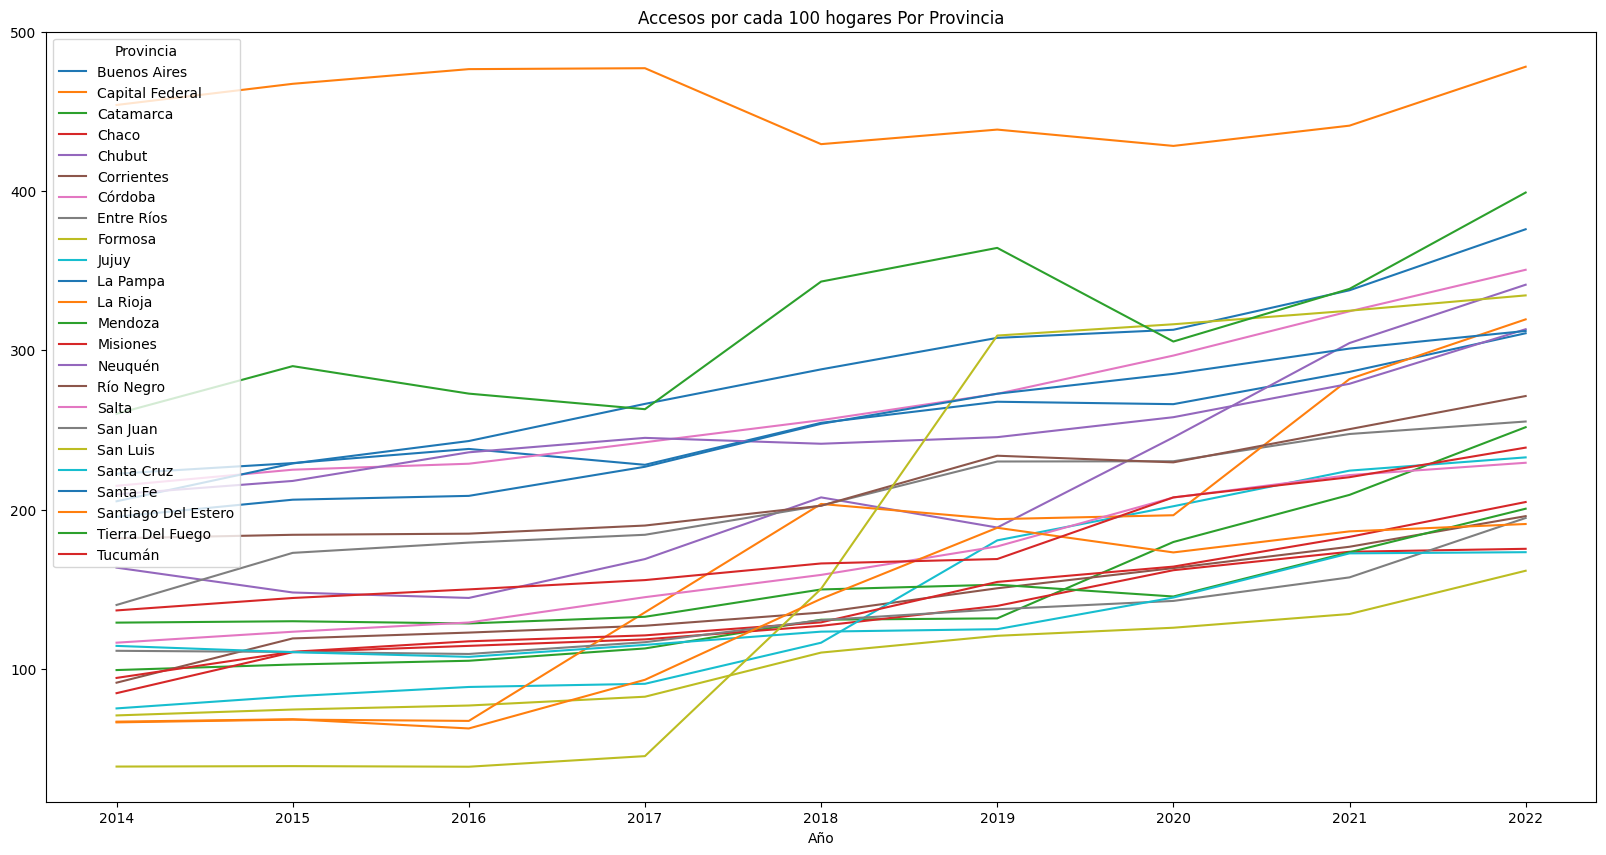

In [81]:
# figura con dimensiones personalizadas
fig, ax = plt.subplots(figsize=(20, 10))

# Agrupa datos por 'Ano' y 'Provincia' y calcula la suma de 'Total'
grouped = data.groupby(['Año', 'Provincia'])['Accesos por cada 100 hogares'].sum().reset_index()

# Cambia la forma de los datos para que cada provincia sea una línea en el gráfico
pivot = grouped.pivot(index='Año', columns='Provincia', values='Accesos por cada 100 hogares')

# Gráfico
pivot.plot(ax=ax)

ax.set_title('Accesos por cada 100 hogares Por Provincia')

# Muestra el gráfico
plt.show()

Figura 5. Este gráfico muestra el número de accesos a internet por cada 100 hogares en Argentina por provincia desde 2014 hasta 2022. El eje 'x' representa el año y el eje 'y' representa el número de accesos a internet. Las líneas representan las diferentes provincias de Argentina. A demas, se observa una tendencia casi constante al aumento en la cantidad de accesos a internet en todas las provincias, donde Capital Federal presenta un notable mayor crecimiento en cantidad y prporcion con respecto a las otras provincias. 

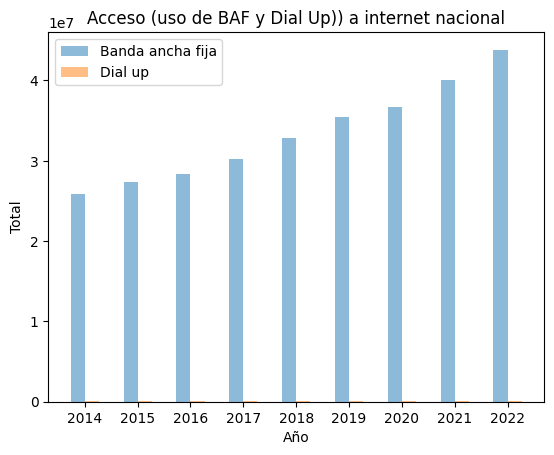

In [82]:
# Agrupa tus datos por 'año' y 'provincia' y calcula la suma de 'banda ancha' y 'dial up'
grouped = data.groupby(['Año'])[['Banda ancha fija', 'Dial up']].sum().reset_index()

# Crea una lista de provincias
años = grouped['Año'].unique()

# Crea un array para las posiciones de las barras en el eje X
bar_positions = np.arange(len(años))

# Calcula el ancho de cada barra
bar_width = 0.8 / len(grouped.columns)

# Crea las barras para cada item
for i, col in enumerate(grouped.columns[1:]):
    plt.bar(bar_positions + i * bar_width, grouped[col], width=bar_width, alpha=0.5, label=col)

# Añade las etiquetas para el eje X
plt.xticks(bar_positions + (len(grouped.columns) - 2) * bar_width / 2, años)

# Añade un título y etiquetas para los ejes
plt.title('Acceso (uso de BAF y Dial Up)) a internet nacional')
plt.xlabel('Año')
plt.ylabel('Total')

# Añade la leyenda
plt.legend()

# Muestra el gráfico
plt.show()

Figura 6. con respecto al diagrama de barras se observa una tendencia creciente constante en el numero de accesos a internet a traves de 'Banda ancha fija', mientras para 'Dial up' se hace casi imperceptible el uso y el efecto dado que los numeros de acceso a internet a traves del mismo es practicamente nulo.

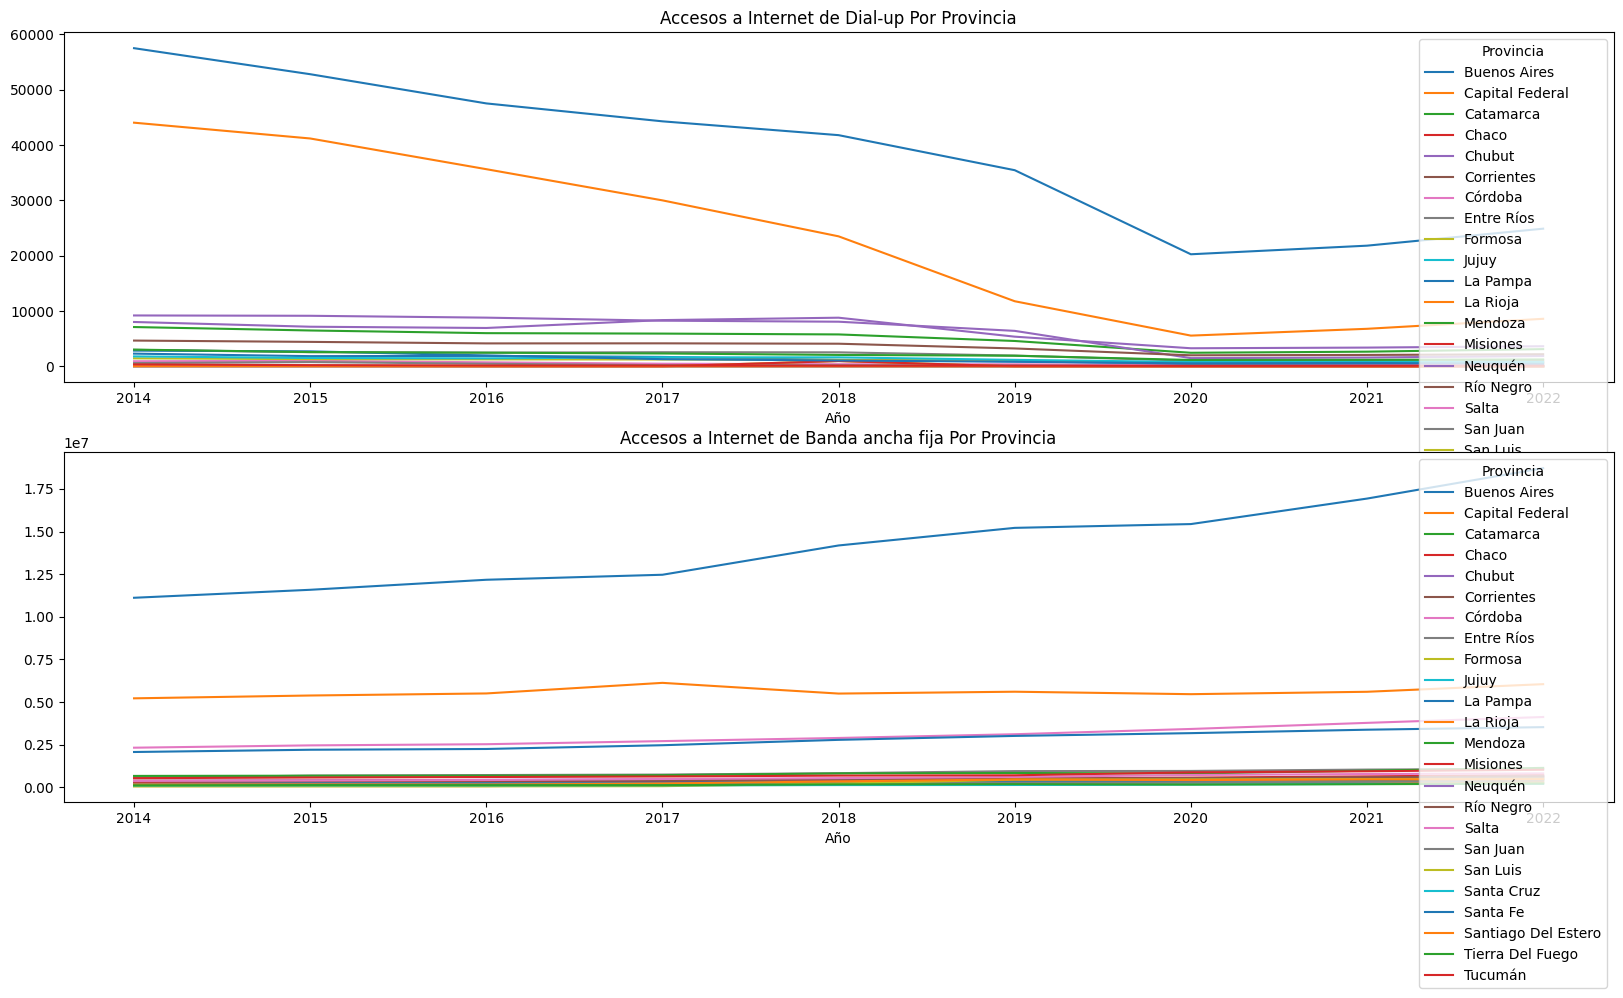

In [83]:
# figura con dimensiones personalizadas
fig, ax = plt.subplots(2,1,figsize=(20, 10))

# Agrupa datos por 'Ano' y 'Provincia' y calcula la suma de 'Total'
grouped1 = data.groupby(['Año', 'Provincia'])['Dial up'].sum().reset_index()
grouped2 = data.groupby(['Año', 'Provincia'])['Banda ancha fija'].sum().reset_index()

# Cambia la forma de los datos para que cada provincia sea una línea en el gráfico
pivot1 = grouped1.pivot(index='Año', columns='Provincia', values='Dial up')
pivot2 = grouped2.pivot(index='Año', columns='Provincia', values='Banda ancha fija')

# Gráfico Dial up
pivot1.plot(ax=ax[0])
ax[0].set_title('Accesos a Internet de Dial-up Por Provincia')

# Gráfico Banda ancha fija
pivot2.plot(ax=ax[1])
ax[1].set_title('Accesos a Internet de Banda ancha fija Por Provincia')

# Muestra el gráfico
plt.show()

Figura 7. en este grafico conjubnto de uso de 'Dial up' y 'Banda ancha fija' se observan las tendencias claras en cuanto a la cantidad de accesos para cada caso, en el caso de 'Dial up' presenta una clara tendecia a la disminucion a lor largo del periodo analizado, por otra parte, en el caso de uso de 'Banda ancha fija' se evidencia la tendencia clara del aumento en la cantidad en el periodo analizado

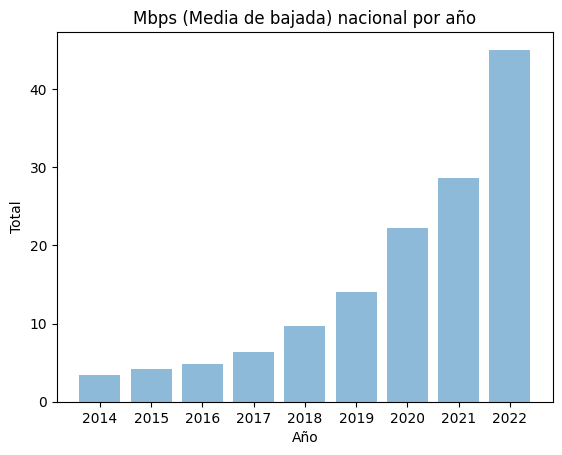

In [84]:
# Agrupa tus datos por 'año' y 'provincia' y calcula la suma de 'banda ancha' y 'dial up'
grouped = data.groupby(['Año'])[['Mbps (Media de bajada)']].mean().reset_index()

# Crea una lista de provincias
años = grouped['Año'].unique()

# Crea un array para las posiciones de las barras en el eje X
bar_positions = np.arange(len(años))

# Crea las barras para 'banda ancha'
plt.bar(bar_positions, grouped['Mbps (Media de bajada)'], align='center', alpha=0.5)

# Añade las etiquetas para el eje X
plt.xticks(bar_positions, años)

# Añade un título y etiquetas para los ejes
plt.title('Mbps (Media de bajada) nacional por año')
plt.xlabel('Año')
plt.ylabel('Total')

# Muestra el gráfico
plt.show()

Figura 8. en el presenta digrama se evidencia un claro comportamiento con tendencia al aumento proporcionalmente considerables en cuanto al promedio 'Media de bajada' a nivel nacional en el periodo desde el 2014 al 2022.

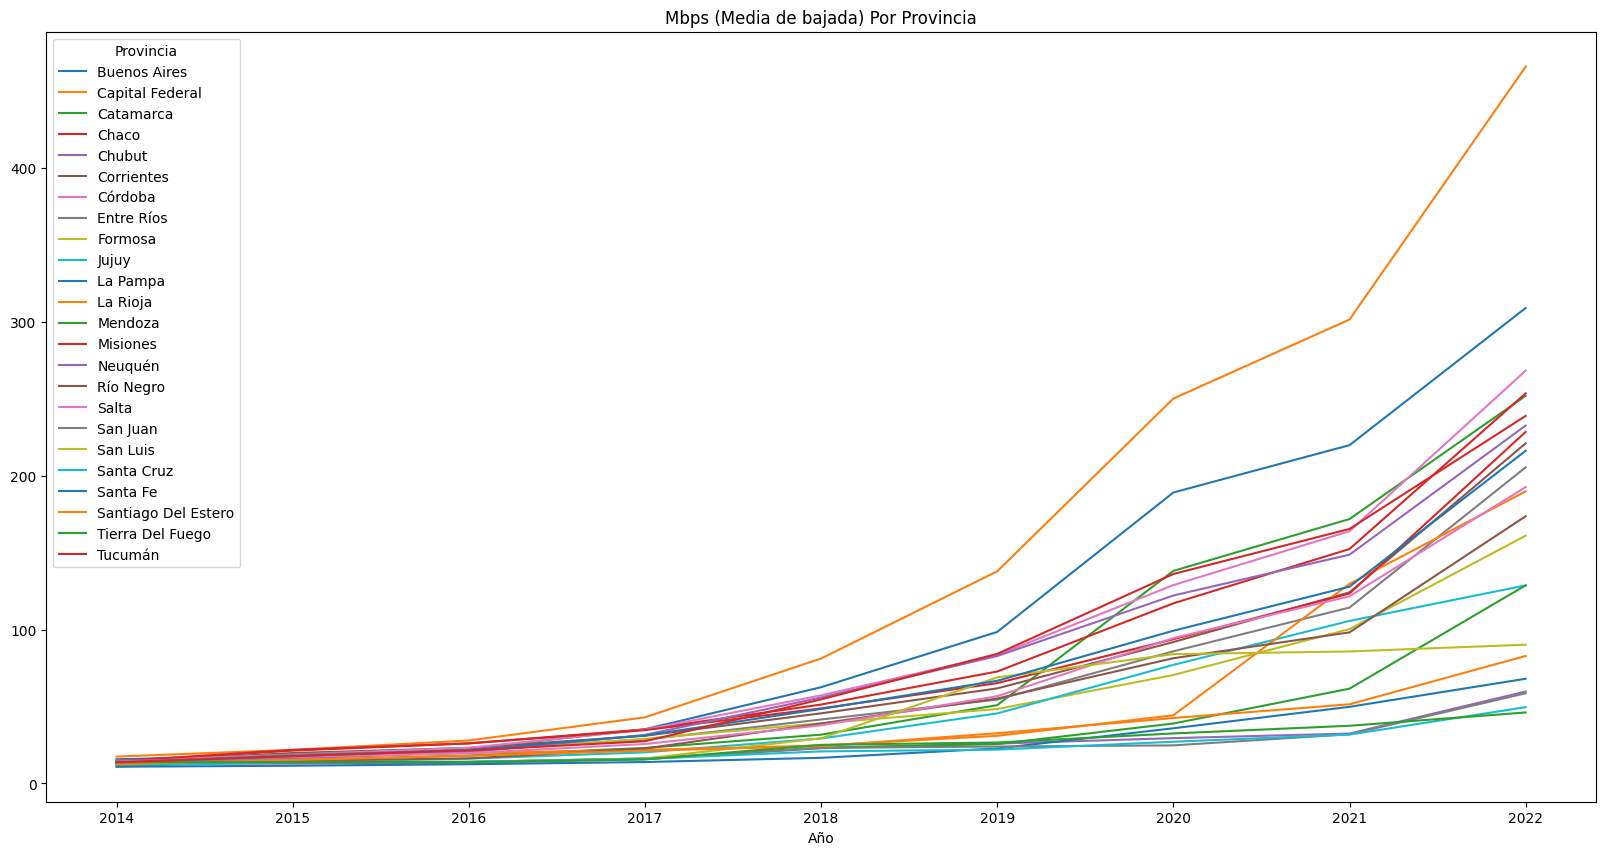

In [85]:
# figura con dimensiones personalizadas
fig, ax = plt.subplots(figsize=(20, 10))

# Agrupa datos por 'Ano' y 'Provincia' y calcula la suma de 'Total'
grouped = data.groupby(['Año', 'Provincia'])['Mbps (Media de bajada)'].sum().reset_index()

# Cambia la forma de los datos para que cada provincia sea una línea en el gráfico
pivot = grouped.pivot(index='Año', columns='Provincia', values='Mbps (Media de bajada)')

# Gráfico
pivot.plot(ax=ax)

ax.set_title('Mbps (Media de bajada) Por Provincia')

# Muestra el gráfico
plt.show()

Fifura 9. en la presente gráfica se observa la tendencia al aumento en la velocidad media de bajada por provincia, en ese sentido, tambien se observa, que hasta el año 2017 se presentaba un crecimiento parejo en todas las provincias, a partir de ese mismo año el crciemiento comienza a diferenciarse en proporcion por provincia, siendo Capital Federal la curva con mayor crecimiento, sin que esto afecte el crecimiento de las demas provincias, es decir el crecimiento el la media de bajada para todas las provincias ha sido continuo en el periodo analizado.

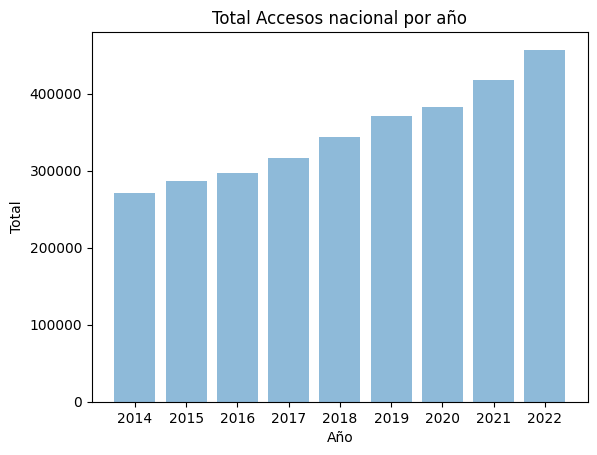

In [86]:
# Agrupa tus datos por 'año' y 'provincia' y calcula la suma de 'banda ancha' y 'dial up'
grouped = data.groupby(['Año'])[['Total']].mean().reset_index()

# Crea una lista de provincias
años = grouped['Año'].unique()

# Crea un array para las posiciones de las barras en el eje X
bar_positions = np.arange(len(años))

# Crea las barras para 'banda ancha'
plt.bar(bar_positions, grouped['Total'], align='center', alpha=0.5)

# Añade las etiquetas para el eje X
plt.xticks(bar_positions, años)

# Añade un título y etiquetas para los ejes
plt.title('Total Accesos nacional por año')
plt.xlabel('Año')
plt.ylabel('Total')

# Muestra el gráfico
plt.show()

Figura 10. En el Histograma de 'Total Accesos  Nacional por año' se evidencia un claro crecimiento en el periodo del analisis, cada año presenta un aumento con respecto al año anterior, es decir, en el periodo analisado el crecimiento ha sido constante.

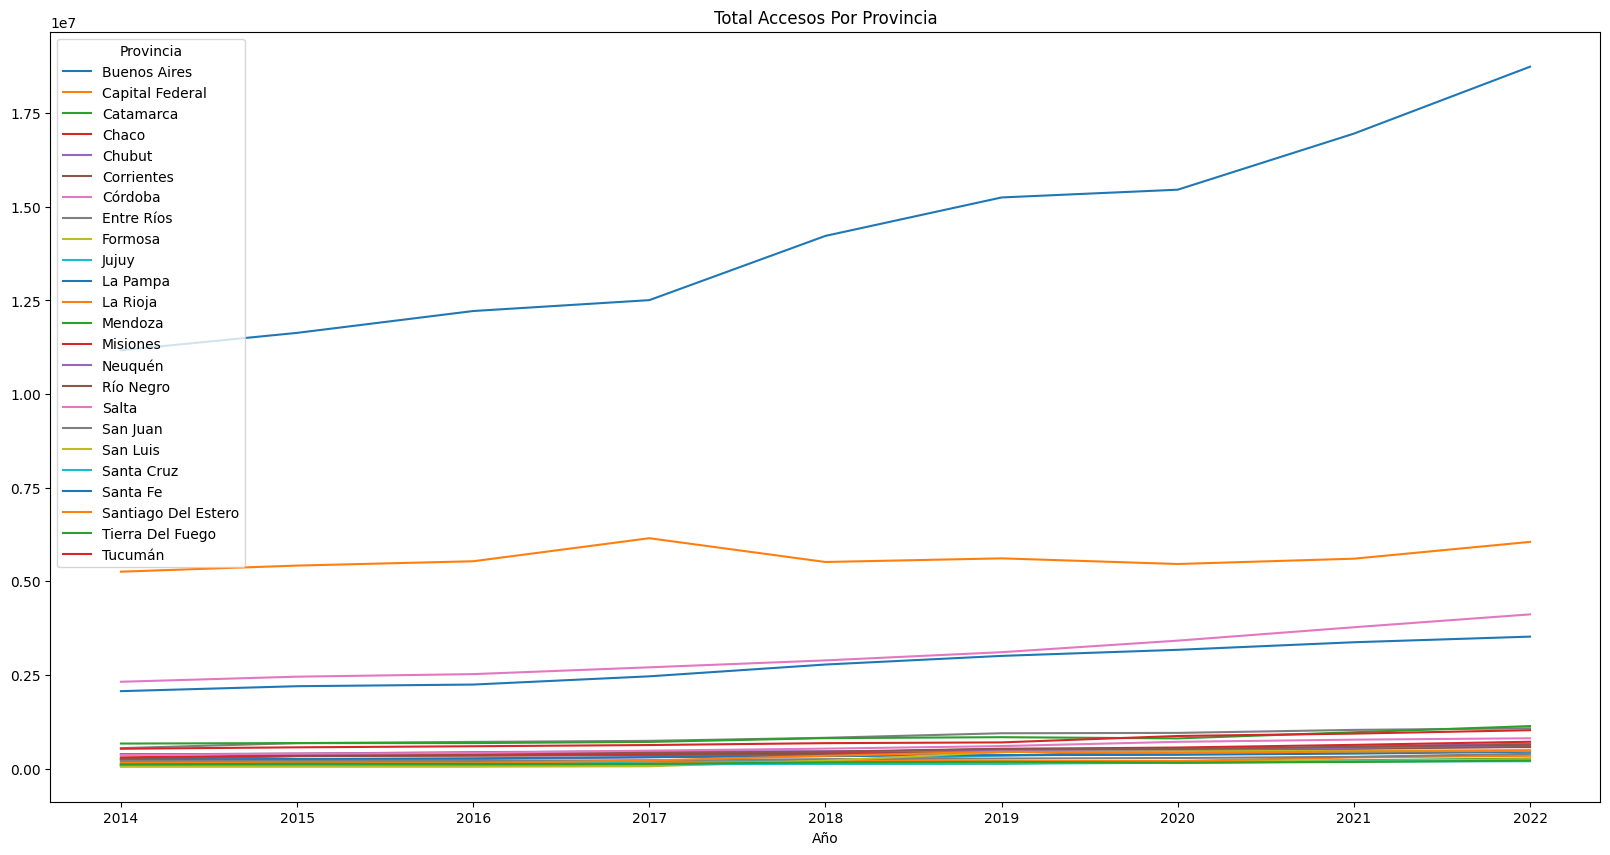

In [87]:
# figura con dimensiones personalizadas
fig, ax = plt.subplots(figsize=(20, 10))

# Agrupa datos por 'Ano' y 'Provincia' y calcula la suma de 'Total'
grouped = data.groupby(['Año', 'Provincia'])['Total'].sum().reset_index()

# Cambia la forma de los datos para que cada provincia sea una línea en el gráfico
pivot = grouped.pivot(index='Año', columns='Provincia', values='Total')

# Gráfico
pivot.plot(ax=ax)

ax.set_title('Total Accesos Por Provincia')

# Muestra el gráfico
plt.show()

Figura 11. Este gráfico muestra el número 'Total Accesos Por Provincia' desde 2014 hasta 2022. El eje 'x' representa el año y el eje 'y' representa el número de accesos a internet. Las líneas representan las diferentes provincias de Argentina. A demas, se observa una tendencia casi constante al aumento en la cantidad de accesos a internet en todas las provincias, donde la provincia de Buenos Aires presenta un notable mayor crecimiento en cantidad y prporcion con respecto a las otras provincias. 

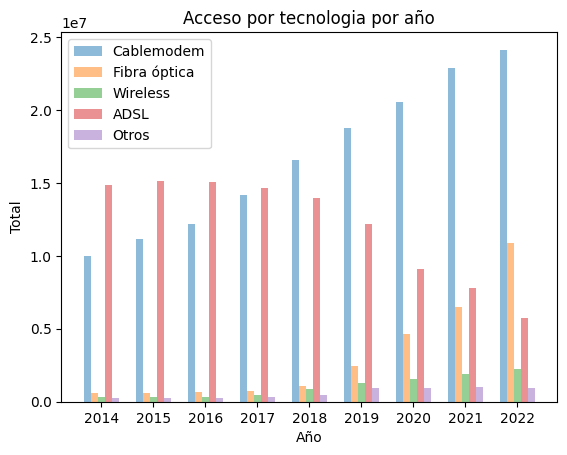

In [88]:
# Agrupa tus datos por 'año' y 'provincia' y calcula la suma de 'banda ancha' y 'dial up'
grouped = data.groupby(['Año'])[['Cablemodem','Fibra óptica','Wireless','ADSL','Otros']].sum().reset_index()

# Crea una lista de provincias
años = grouped['Año'].unique()

# Crea un array para las posiciones de las barras en el eje X
bar_positions = np.arange(len(años))

# Calcula el ancho de cada barra
bar_width = 0.8 / len(grouped.columns)

# Crea las barras para cada item
for i, col in enumerate(grouped.columns[1:]):
    plt.bar(bar_positions + i * bar_width, grouped[col], width=bar_width, alpha=0.5, label=col)

# Añade las etiquetas para el eje X
plt.xticks(bar_positions + (len(grouped.columns) - 2) * bar_width / 2, años)

# Añade un título y etiquetas para los ejes
plt.title('Acceso por tecnologia por año')
plt.xlabel('Año')
plt.ylabel('Total')

# Añade la leyenda
plt.legend()

# Muestra el gráfico
plt.show()

Figura 12. Este diagrama de barras muetra el 'Acceso por Tecnologia por año' donde para todas las tecnologias en su proporcion presentan un crecimiento constante a lo largo del periodo analizado, excepto para tecnologia ADSL la cual presenta una tendencia a la baja considerable a partir del año 2017 hasta el final del periodo.